In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import itertools
from copy import copy

In [448]:
def remove_matched (couples_list) :
    couples_list = [i for i in couples_list if i[0] not in [i[0] for i in perfect_match]]
    couples_list = [i for i in couples_list if i[1] not in [i[1] for i in perfect_match]]
    for i in perfect_match :
        couples_list.append(i)
    return couples_list
def match_remove_matched (couples_list) :
    couples_list = [i for i in couples_list if i[0] not in [i[0] for i in perfect_match]]
    couples_list = [i for i in couples_list if i[1] not in [i[1] for i in perfect_match]]
    return couples_list
def remove_no_match (couples_list) :
    couples_list = [i for i in couples_list if i not in [i for i in no_match]]
    return couples_list
def process_match (match, match_matches) :
    # remove no matches 
    match = remove_no_match(match)
    # remove perfect matches and reduce _matches by that value
    match_perfect_matches = [i for i in match if "".join(i) in ["".join(i) for i in perfect_match]]
    # if the remaining value is 0, add all matches to no_match
    if len(match_perfect_matches) == match_matches :
        match = [i for i in match if "".join(i) not in ["".join(i) for i in perfect_match]]
        for i in match :
            if "".join(i) not in ["".join(i) for i in no_match] :
                no_match.append(i)
            else :
                continue
        match_matches_remaining = match_matches - len(match_perfect_matches)
    else : 
        match_matches_remaining = match_matches - len(match_perfect_matches)
    match = remove_no_match(match_remove_matched(match))
    return (match, match_matches_remaining)
def df_match_probability (match, match_matches) :
    df = pd.DataFrame(data=match, columns=["man","woman"])
    if match_matches == 0 :
        df["probability"] = 0
    else :
        df["probability"] = match_matches/len(match)
    return df
def append_probability (df) :
    for row in df.itertuples(index=False)  :
        for couple in couples_df.itertuples(index=False)  :
            if (row.man == couple.man) & (row.woman == couple.woman) :
                couple.probability.append(row.probability)
            else :
                continue
                #couple.probability.append(np.NaN)
def Score (df):
    if df["Count"] == 0 :
        _ = 0
    else :
        _ = df["Sum"]/df["Count"]
    return _

In [478]:
men=["Zak","Devin","Tyler","Connor","Mike","Hunter","Alec","Chuck","Nelson","Austin"]
women=["Rashida","Kiki","Cheyenne","Stacey","Hannah","Amanda","Kayla","Melanie","Britni","Chelsey"]
men.sort()
women.sort()
perfect_match = [("Connor","Chelsey"),("Zak","Kayla")]
no_match = [("Hunter","Kiki"),("Devin","Kiki"),("Zak","Kiki"),("Chuck","Britni"),("Chuck","Kiki"),("Alec","Melanie"),("Nelson","Kiki"),
("Hunter","Britni")]
match1 = [("Chuck","Hannah"),("Tyler","Rashida"),("Mike","Amanda"),("Devin","Melanie"),("Connor","Chelsey"),("Austin","Kiki"),
("Alec","Stacey"),("Hunter","Britni"),("Nelson","Cheyenne"),("Zak","Kayla")]
match1_matches = 2
match2 = [("Hunter","Stacey"),("Austin","Kiki"),("Connor","Kayla"),("Nelson","Cheyenne"),("Mike","Amanda"),("Zak","Britni"),
("Devin","Melanie"),("Tyler","Rashida"),("Alec","Chelsey"),("Chuck","Hannah")]
match2_matches = 0
match3 = [("Connor","Chelsey"),("Austin","Amanda"),("Devin","Rashida"),("Tyler","Cheyenne"),("Nelson","Melanie"),("Zak","Hannah"),
("Mike","Kayla"),("Alec","Stacey"),("Hunter","Britni")]
match3_matches = 3
match4 = [("Alec","Amanda"),("Tyler","Melanie"),("Chuck","Kiki"),("Devin","Hannah"),("Mike","Kayla"),("Connor","Chelsey"),("Nelson","Britni"),
("Hunter","Rashida"),("Austin","Stacey"),("Zak","Cheyenne")]
match4_matches = 2
match5 = [("Connor","Chelsey"),("Hunter","Melanie"),("Mike","Britni"),("Alec","Stacey"),("Zak","Kayla"),("Nelson","Rashida"),("Devin","Cheyenne"),
("Austin","Hannah"),("Chuck","Kiki"),("Tyler","Amanda")]
match5_matches = 2
match6 = [("Connor","Chelsey"),("Chuck","Amanda"),("Tyler","Hannah"),("Zak","Kayla"),("Austin","Cheyenne"),("Hunter","Britni"),("Alec","Stacey"),
("Nelson","Kiki"),("Devin","Rashida"),("Mike","Melanie")]
match6_matches = 3
match7 = [("Connor","Chelsey"),("Alec","Rashida"),("Nelson","Kiki"),("Hunter","Amanda"),("Devin","Britni"),("Chuck","Melanie"),("Zak","Hannah"),
("Mike","Stacey"),("Austin","Kayla"),("Tyler","Cheyenne")]
match7_matches = 3
match8 = [("Connor","Chelsey"),("Mike","Melanie"),("Hunter","Britni"),("Alec","Stacey"),("Tyler","Cheyenne"),("Chuck","Amanda"),("Devin","Rashida"),
("Zak","Hannah"),("Nelson","Kayla"),("Austin","Kiki")]
match8_matches = 3
match9 = [("Connor","Chelsey"),("Hunter","Kayla"),("Austin","Cheyenne"),("Alec","Stacey"),("Devin","Britni"),("Zak","Hannah"),("Tyler","Melanie"),
("Mike","Kiki"),("Nelson","Amanda"),("Chuck","Rashida")]
match9_matches = 2
match10 = [("Connor","Chelsey"),("Zak","Kayla"),("Austin","Britni"),("Hunter","Hannah"),("Devin","Rashida"),("Tyler","Cheyenne"),("Alec","Amanda"),
("Nelson","Stacey"),("Chuck","Melanie"),("Mike","Kiki")]
match10_matches = 2

In [479]:
for n in reversed(range(1,11)) :
    exec("(match{n}, match{n}_matches) = process_match(match{n}, match{n}_matches)".format(n=n))
for n in range(1,11) :
    exec("(match{n}, match{n}_matches) = process_match(match{n}, match{n}_matches)".format(n=n))
for n in reversed(range(1,11)) :
    exec("(match{n}, match{n}_matches) = process_match(match{n}, match{n}_matches)".format(n=n))
for n in range(1,11) :
    exec("match{n}_df = df_match_probability (match{n}, match{n}_matches)".format(n=n))
all_couples = list(itertools.product(men, women))
remaining_couples = remove_no_match(remove_matched(all_couples))
couples_df = pd.DataFrame(data=remaining_couples, columns=["man","woman"])
couples_df["probability"] = np.empty((len(couples_df), 0)).tolist()
for n in range(1,11) :
    exec("append_probability(match{n}_df)".format(n=n))
couples_df["Sum"] = couples_df["probability"].apply(sum)
couples_df["Count"] = couples_df["probability"].apply(len)
couples_df["Score"] = couples_df.apply(Score, axis=1)
couples_df.to_csv("couples.csv")
couples_df.sort_values(by=["Score","woman"], ascending=False).to_csv("couples_rank.csv")
couples_df.sort_values(by=["Score","woman"], ascending=False).head(10)


,man,woman,probability,Sum,Count,Score
35,Nelson,Melanie,[0.5],0.500000,1,0.500000
6,Austin,Amanda,[0.5],0.500000,1,0.500000
38,Tyler,Cheyenne,"[0.5, 0.3333333333333333, 0.5]",1.333333,3,0.444444
20,Devin,Rashida,"[0.5, 0.2, 0.5]",1.200000,3,0.400000
29,Mike,Melanie,"[0.2, 0.5]",0.700000,2,0.350000
12,Chuck,Amanda,"[0.2, 0.5]",0.700000,2,0.350000
31,Mike,Stacey,[0.3333333333333333],0.333333,1,0.333333
5,Alec,Rashida,[0.3333333333333333],0.333333,1,0.333333
14,Chuck,Melanie,[0.3333333333333333],0.333333,1,0.333333
22,Hunter,Amanda,[0.3333333333333333],0.333333,1,0.333333


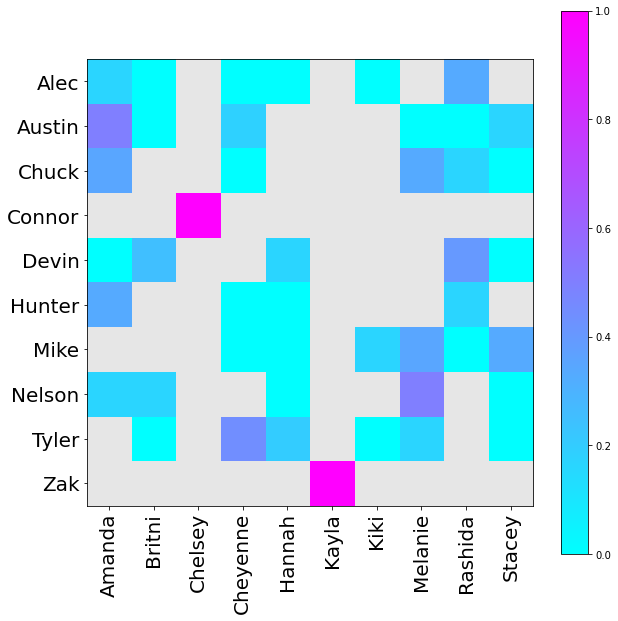

In [480]:
all_couples_df = pd.DataFrame(data=all_couples, columns=["man","woman"]).sort_values(by=["man","woman"])
all_couples_df = all_couples_df.merge(couples_df, how="left", right_on=["man","woman"], left_on=["man","woman"])
for i in perfect_match :
    for row in all_couples_df.itertuples():
        if (i[0] == row[1]) & (i[1] == row[2]) :
            all_couples_df.at[row[0], 'Score'] = 1
        else :
            continue
df = (all_couples_df.groupby(["man"])
      .agg({'Score': lambda x: x.tolist()})
      .rename({'Score' : 'Scores'},axis=1)
      .reset_index())
scores = [
    i[1] for i in df.itertuples(index=False)
]
pallete = copy(plt.cm.cool)
pallete.set_bad("k",.1)
plt.imshow(scores, cmap=pallete)
plt.xticks(ticks=range(0,10), labels=women, rotation=90)
plt.yticks(ticks=range(0,10), labels=men)
plt.colorbar()
plt.gcf().set_size_inches(10,10)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [477]:

couples_df.sort_values(by=["Sum","woman"], ascending=False).head(10)

,man,woman,probability,Sum,Count,Score
38,Tyler,Cheyenne,"[0.5, 0.3333333333333333, 0.5]",1.333333,3,0.444444
20,Devin,Rashida,"[0.5, 0.2, 0.5]",1.200000,3,0.400000
29,Mike,Melanie,"[0.2, 0.5]",0.700000,2,0.350000
12,Chuck,Amanda,"[0.2, 0.5]",0.700000,2,0.350000
35,Nelson,Melanie,[0.5],0.500000,1,0.500000
18,Devin,Britni,"[0.3333333333333333, 0.16666666666666666]",0.500000,2,0.250000
6,Austin,Amanda,[0.5],0.500000,1,0.500000
8,Austin,Cheyenne,"[0.2, 0.16666666666666666]",0.366667,2,0.183333
31,Mike,Stacey,[0.3333333333333333],0.333333,1,0.333333
5,Alec,Rashida,[0.3333333333333333],0.333333,1,0.333333


In [ ]:
guess = [("Connor","Chelsey"),("Zak","Kayla"),("Tyler","Cheyenne"),("Devin","Rashida"),("Alec","Amanda"),("Austin","Stacey"),("Hunter","Hannah"),
("Chuck","Melanie"),("Mike","Kiki"),("Nelson","Britni")]